## CS50 Final Project: Machine Learning on CT-Scans of Breast Cancer

#### Maximilian Englisch, GitHub/edX: maxenglisch
##### Frankfurt a.M. Germany, 14.08.24

In [95]:
# if there is no sklearn already installed: install with this: ! is inline magic and acts as terminal
# ! pip install scikit-learn
# remove hashtag if you need to download 
# ! pip install seaborn

In [96]:
# first of all, install all necessary libraries and import datasets

import sklearn 
import random
import numpy as np 

# we're working with the breast cancer dataset here 
from sklearn.datasets import load_breast_cancer


In [97]:
# actually getting the data to work with
data = load_breast_cancer()

# let's see what this actually is 
# print(data)

# ok looks like we have a dict with a few key value pairs:
# "data", "target", "target_names" etc. standard stuff

# lets get all that into some variables
descr = data["DESCR"]
target_data = data["target"]
target_names = data["target_names"]
feature_names = data["feature_names"]
feature_data = data["data"]

# lets get a better look
# print(descr) # here we have a good description
# 569 imgs, 30 attributes, names of attr etc. 
print(f"target_names: {target_names}") # labels are "malignant" and "benign"
print(f"target data: {target_data}") # i guess 0 for malign and 1 for benign
print(f"feature_names: {feature_names}") # here we have a lot of features to determine a tumor type
print(f"feature data: {feature_data}") # here we the data for each of the features and all the imgs so thats what we'll work with



target_names: ['malignant' 'benign']
target data: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0

In [98]:
# now we need to split in training and testing data 

def split_train_test(data, labels, test_size=0.2, random_state=None):
    """ 
    Splitting our set into 20% test and 80% training data.
    """

    # combine data and labels into list of tupels to work with
    comb_data = list(zip(data, labels))

    # set random seed for better testability
    if random_state is not None:
        random.seed(random_state)

    # shuffle data 
    random.shuffle(comb_data)

    # calculate the index where we split train and test data
    split_index = len(comb_data) * (1 - test_size) # using the full length of our data list and mul with 1 - our test size
    # so we get the split at the first 20% of the list as test and the rest 80% will be training 
    split_index = int(split_index) # getting a integer so no weird indices 

    # actually split now with basic indexing
    test_data = comb_data[:split_index]
    train_data = comb_data[split_index:]

    # separating labels and data so we can better work with them later
    test_data, test_labels = zip(*test_data)
    train_data, train_labels = zip(*train_data)

    return test_data, train_data, test_labels, train_labels 

# calling our function to split the data 
train_data, test_data, train_labels, test_labels = split_train_test(feature_data, target_data, test_size=0.2, random_state=1337)


#### now to the actual "machine learning" i.e. statistics and probability: Gaussian Naive Bayes 


We assume a lot here: first naive bayes assumes that our features are completely independent of eachother (untrue but useful here) 
then we also assume a gaussian distribution = normal distr. so we have our mean and variance

First of all, we need to calculate our mean and variance, we simply use the numpy implementations here, but the equations are also simple math \
X is a common input for our data here: X = train_data \
and y is common for our labels so: y = train_labels 

In [99]:
# first we need our data and labels as numpy arrays:
train_data = np.array(train_data)
train_labels = np.array(train_labels)


def calculate_mean_variance(train_data, train_labels):
    """
    Calculate the mean and variance for each feature, per class.
    """

    classes = np.unique(train_labels)  # find the unique classes (0 and 1 = malignant and benign)
    mean_var = {}  # start with empty dict to fill up
    
    for c in classes:
        train_data_class = train_data[train_labels == c]  # select all rows where the label is c to fill the two classes

        mean_var[c] = {
            "mean": np.mean(train_data_class, axis=0),  # calculate mean for class with np.mean and axis 0 = columns
            "var": np.var(train_data_class, axis=0)  # calculate variance with np.var on axis=0 so the columns
        }
    
    # we return a dict with our two classes and the mean values for each feature and the variance of each feature per class
    return mean_var

print(calculate_mean_variance(train_data, train_labels))

{0: {'mean': array([1.73710714e+01, 2.18598810e+01, 1.14755536e+02, 9.69440476e+02,
       1.03205774e-01, 1.45065238e-01, 1.60433095e-01, 8.74886310e-02,
       1.94123214e-01, 6.28203571e-02, 6.12105952e-01, 1.24278810e+00,
       4.35935714e+00, 7.29198810e+01, 6.88604167e-03, 3.30308750e-02,
       4.25891071e-02, 1.51805238e-02, 2.11143393e-02, 4.10625595e-03,
       2.09760119e+01, 2.96514286e+01, 1.40387798e+02, 1.40334345e+03,
       1.44564226e-01, 3.74955417e-01, 4.46911786e-01, 1.80739345e-01,
       3.26983333e-01, 9.15328571e-02]), 'var': array([1.06452584e+01, 1.55811000e+01, 5.00293120e+02, 1.40206213e+05,
       1.73182090e-04, 3.14252616e-03, 6.23797269e-03, 1.28556854e-03,
       7.68733806e-04, 5.93209927e-05, 1.28227038e-01, 2.25211580e-01,
       7.10938246e+00, 4.19840666e+03, 9.48711422e-06, 3.69302470e-04,
       5.22655362e-04, 2.87142522e-05, 1.12600906e-04, 3.88939864e-06,
       1.86604692e+01, 3.21902384e+01, 9.05115898e+02, 3.58413908e+05,
       4.9031924

In [100]:
# next we calculate the probability of the classes in our dataset, this is called Prior Probabilities P(C) and we need it for our bayes
# equation 

def calculate_class_prior(labels):
    # simply get the classes counts and just divide by the total number of instances, that gets us the class prior
    class_counts = np.bincount(labels) 
    class_prior = class_counts / len(labels)

    return class_prior

print(calculate_class_prior(train_labels))

[0.36923077 0.63076923]


In [101]:
# next is a bit more math called gaussian density, we calculate the probability of a feature in a given class
# P(x|C) with x = feature and C = class, the equation is complicated and layed out here in code: 

def gaussian_density(x, mean, var):

    # basically the gaussian density formula in code with numpy
    mul = 1.0 / np.sqrt(2 * np.pi * var)
    exp = np.exp(-((x - mean) ** 2) / (2 * var))
    return mul * exp 

##### now we get to the (naive) bayes part: 
we want to find out our class (begning or malignant) given our features x \
so we want to know: P(C|x) = prob of class C, given features x \
and the formula for this is: P(C|x) = P(C) * P(x|C)
so the probability of class C multiplied with the probability of feature x, given class C\
\
we already have calculated P(C) so what is left is P(x|C) we get that with: \
P(x∣C)=∏(i=1 to M) P(x_i∣C) so the mul of all our likelihoods of feature x_i being present in class C for that we need var and mean\
#### this is exactly our gaussian density which we calculated before
and just calculate it with our gaussian density function for every x_i with M = number of features \
this is called posterior probability for each feature, given the class C
\
\
(the naive part makes it easier to calculate because we just assume all features are independent)

 


In [102]:
# this is the heart of the model: here we calculate P(x|C) so the likelihood of feature x given class C

def calculate_posterior_probabilities(test_sample, class_means, class_variances, class_priors):
    # initalize the dicts
    posteriors = {}
    # our features are the length of the test sample, so the number of samples
    num_features = len(test_sample)
    
    # for each class: looping through the prior and assigning likelihood of feature to 1 as standard
    for c in class_means.keys():
        prior = class_priors[c]
        likelihood = 1.0
        
        # for each feature, get the mean and var from our class means and vars and use gaussian_density to up our likelihood
        # this is exactly the bayesian formula written out in code
        for i in range(num_features):
            mean = class_means[c][i]
            variance = class_variances[c][i]
            likelihood *= gaussian_density(test_sample[i], mean, variance)
            
        posteriors[c] = prior * likelihood
    return posteriors

putting it all together: 

In [103]:
# our real prediction function: using posterior_possibilites and then getting the max of that

def predict(test_sample, class_means, class_vars, class_priors):
    posteriors = calculate_posterior_probabilities(test_sample, class_means, class_vars, class_priors)
    print((posteriors))
    return max(posteriors, key=posteriors.get)  # Class with highest posterior probability


and testing accuracy at the end to see how well our model works: 

In [104]:
# accuary function with test data and labels, our mean_vars and prior per class
def accuracy(test_data, test_labels, mean_var, class_prior):

    # splitting means and vars per class for our predict function
    class_means = {}
    class_vars = {}
    for c, data in mean_var.items():
        class_means[c] = data["mean"]
        class_vars[c] = data["var"]
    
    # building a list of predictions for each sample in our test_data split with means and vars and priors
    predictions = [predict(sample, class_means, class_vars, class_prior) for sample in test_data]
    
    # turning it into an array for better ability to work on it
    predictions = np.array(predictions)

    # counting our correct predictions with boolean testing
    correct = np.sum(predictions == test_labels)
    
    # our total are all our samples real labels
    total = len(test_labels)

    # returning the percentage of correct predictions to total samples
    return correct / total 


# using our previous functions to get mean_vars from our train data
mean_var = calculate_mean_variance(train_data, train_labels)

# calculating our class priors (P(C))
class_prior = calculate_class_prior(train_labels)

# running the final test
acc = accuracy(test_data, test_labels, mean_var, class_prior)

# printing accuary as a nice percentage
print("Accuracy:", round(acc*100, 2), "%")

{0: 7.04806934136173e-08, 1: 1196874774.1596222}
{0: 2.0186195590967852e-13, 1: 2867340.023349892}
{0: 6.464460092056503e-06, 1: 122925951.19885117}
{0: 4.1663422983915923e-07, 1: 4245355569.4228272}
{0: 4.080437407616274e-20, 1: 8.631599237144489e-21}
{0: 4.4980388880295235e-18, 1: 9.591918245003853}
{0: 23.170770668791164, 1: 5.658036629511745e-12}
{0: 3.042807051769791e-08, 1: 2270454691.7928963}
{0: 1.2767213472958989e-07, 1: 80186420.17768607}
{0: 5.307488380956891e-12, 1: 6.873489894441392e-249}
{0: 0.01070501157692221, 1: 37075610.91457257}
{0: 567.7264467916116, 1: 7.845408810197868e-21}
{0: 264.83876464143015, 1: 3.765444885785645e-10}
{0: 3146.3965824301304, 1: 8.301950404534802e-15}
{0: 0.00018167310515520248, 1: 4.836720150227069e-200}
{0: 6.157080336343227e-08, 1: 6903589438.436896}
{0: 263.02000885011955, 1: 1.0536674530816643e-29}
{0: 0.0008053931679297896, 1: 34202722896.90833}
{0: 2.7905369758186174e-10, 1: 5.987090722779437e-40}
{0: 0.0017662595772617539, 1: 60.061569

Now that we know the model works pretty well, we can start to understand what's going on more, the best way to do it for me is with visualizations like graphs and plots, luckily, python has some awesome libraries we can work with. 

### First let's see how the features are distributed in our malignant and benign tumors

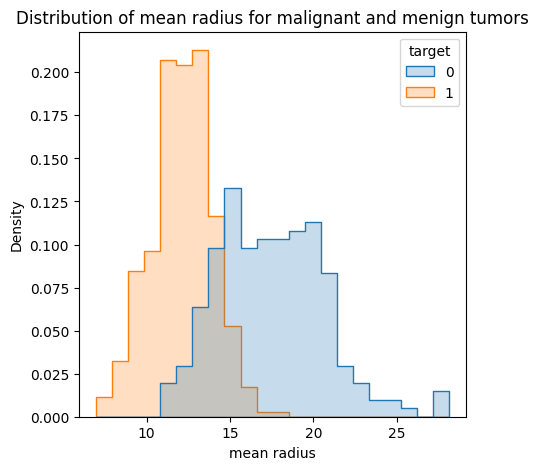

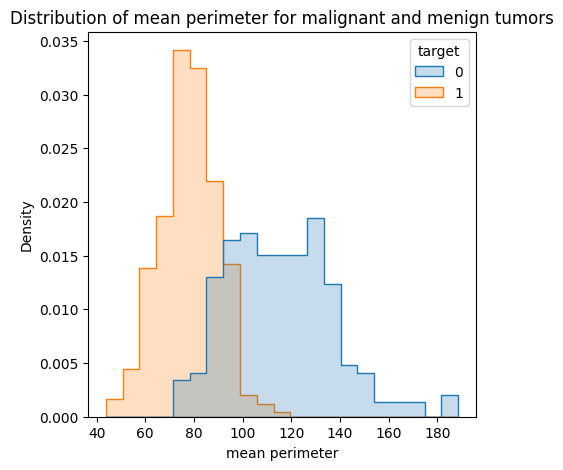

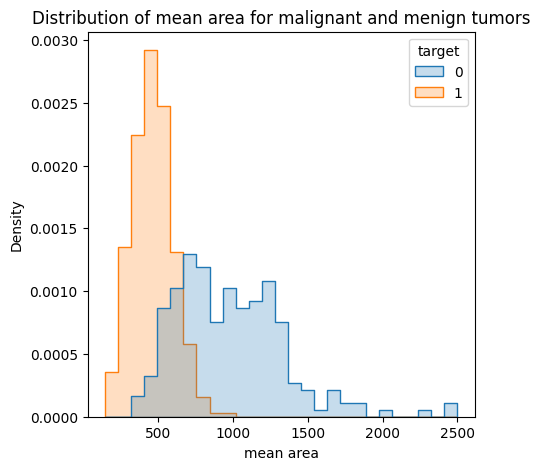

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# we use pandas dataframes here for easier access to data and better visualisations with matplotlib and seaborn
df = pd.DataFrame(feature_data, columns=feature_names)
df['target'] = target_data

# choosing nice features where we see the discrapencies between classes
key_features = ['mean radius', 'mean perimeter', 'mean area']

# looping through the features and building histplot for each one
for feature in key_features:
    plt.figure(figsize=(5, 5))
    sns.histplot(data=df, x=feature, hue='target', element='step', stat="density", common_norm=False)
    plt.title(f'Distribution of {feature} for malignant and menign tumors')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


##### now something different: seeing how the feature data really are in the two different classes with correct units

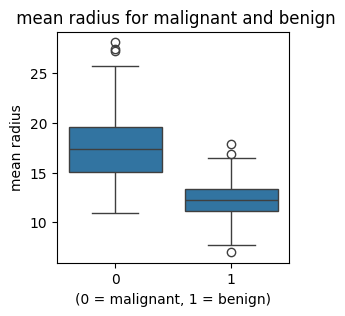

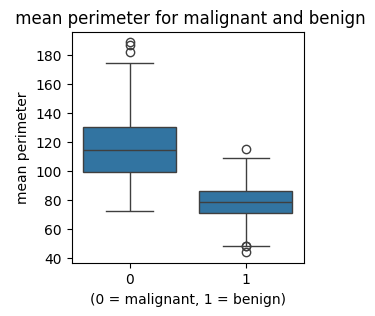

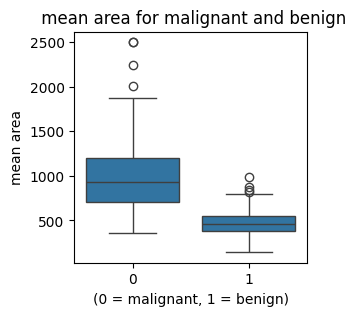

In [106]:
for feature in key_features:
    plt.figure(figsize=(3, 3))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f' {feature} for malignant and benign')
    plt.xlabel('(0 = malignant, 1 = benign)')
    plt.ylabel(feature)
    plt.show()


### Now a really cool visualization from sklearns library: the confusion matrix
(combined with sns heatmap)

 here we see how many of our predicted labels actually match the true labels by basically comparing the lists of the two \
we also get to see how many false negatives and positives we have, this concludes our visualization part

{0: 7.04806934136173e-08, 1: 1196874774.1596222}
{0: 2.0186195590967852e-13, 1: 2867340.023349892}
{0: 6.464460092056503e-06, 1: 122925951.19885117}
{0: 4.1663422983915923e-07, 1: 4245355569.4228272}
{0: 4.080437407616274e-20, 1: 8.631599237144489e-21}
{0: 4.4980388880295235e-18, 1: 9.591918245003853}
{0: 23.170770668791164, 1: 5.658036629511745e-12}
{0: 3.042807051769791e-08, 1: 2270454691.7928963}
{0: 1.2767213472958989e-07, 1: 80186420.17768607}
{0: 5.307488380956891e-12, 1: 6.873489894441392e-249}
{0: 0.01070501157692221, 1: 37075610.91457257}
{0: 567.7264467916116, 1: 7.845408810197868e-21}
{0: 264.83876464143015, 1: 3.765444885785645e-10}
{0: 3146.3965824301304, 1: 8.301950404534802e-15}
{0: 0.00018167310515520248, 1: 4.836720150227069e-200}
{0: 6.157080336343227e-08, 1: 6903589438.436896}
{0: 263.02000885011955, 1: 1.0536674530816643e-29}
{0: 0.0008053931679297896, 1: 34202722896.90833}
{0: 2.7905369758186174e-10, 1: 5.987090722779437e-40}
{0: 0.0017662595772617539, 1: 60.061569

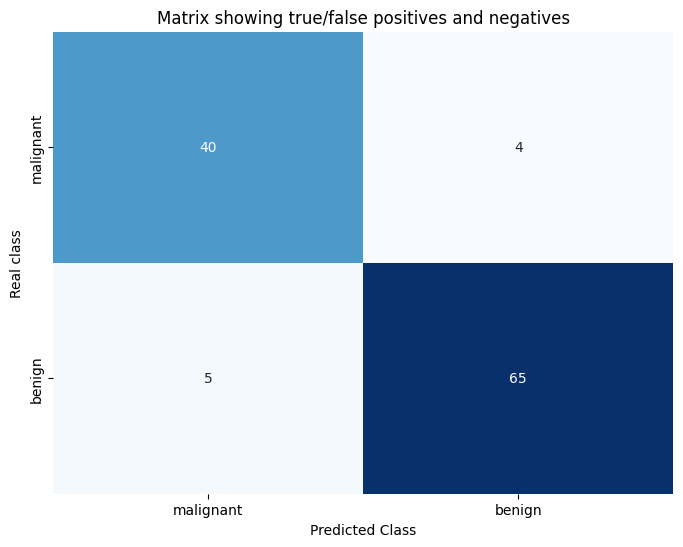

In [107]:
from sklearn.metrics import confusion_matrix

# running predicts again to feed into our visualization
class_means = {}
class_vars = {}
for c, data in mean_var.items():
    class_means[c] = data["mean"]
    class_vars[c] = data["var"]

predictions = [predict(sample, class_means, class_vars, class_prior) for sample in test_data]
print(predictions)

# using the imported cm from sklearn
# outuputs a matrix (list with lists) of comparisons between actual labels and predictions
cm = confusion_matrix(test_labels, predictions)
print(cm)

# plotting our figure with heatmap, input our confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=target_names, yticklabels=target_names, cbar=False)
plt.title('Matrix showing true/false positives and negatives')
plt.xlabel('Predicted Class')
plt.ylabel('Real class')
plt.show()


## That's it for my final project! Thanks a lot for everything CS50